In [2]:
import pandas as pd
import numpy as np

# **Performing an anti join**

In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the `employee` table by a table of top customers, returning only those employees who are not assigned to a customer. The results should resemble the results of an anti join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

The `top_cust` and `employees` tables have been provided for you in the first few lines of the codecell given below.

**Instructions:**
* Merge `employees` and `top_cust` with a left join, setting `indicator` argument to `True`. Save the result to `empl_cust`.
* Select the `srid` column of `empl_cust` and the rows where `_merge` is `'left_only'`. Save the result to `srid_list`.
*Subset the `employees` table and select those rows where the `srid` is in the variable `srid_list` and print the results.


In [3]:
#Loading the top_cust and employees DataFrames from dataset files
top_cust = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/top_cust.csv?raw=True')
employees = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/employees.csv?raw=True')

#Exploring the firt few rows of top_cust and employees
print(top_cust.head())
print(employees.head())

# Merge employees and top_cust
import pandas as pd

# Assuming `employees` and `top_cust` DataFrames are already provided

# Step 1: Perform a left join with the indicator argument set to True
empl_cust = employees.merge(top_cust, on='srid', how='left', indicator=True)

# Step 2: Select the `srid` column for rows where `_merge` is 'left_only'
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

# Step 3: Subset the `employees` table where `srid` is in `srid_list`
result = employees[employees['srid'].isin(srid_list)]


# Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list).isin])

   cid  srid      fname        lname               phone                 fax  \
0    1     3       Luís    Gonçalves  +55 (12) 3923-5555  +55 (12) 3923-5566   
1    2     5     Leonie       Köhler    +49 0711 2842222                 NaN   
2    3     3   François     Tremblay   +1 (514) 721-4711                 NaN   
3    4     4      Bjørn       Hansen     +47 22 44 22 22                 NaN   
4    5     4  František  Wichterlová    +420 2 4172 5555    +420 2 4172 5555   

                      email  
0      luisg@embraer.com.br  
1     leonekohler@surfeu.de  
2       ftremblay@gmail.com  
3     bjorn.hansen@yahoo.no  
4  frantisekw@jetbrains.com  
   srid    lname     fname                title  hire_date  \
0     1    Adams    Andrew      General Manager 2002-08-14   
1     2  Edwards        cy        Sales Manager 2002-05-01   
2     3  Peacock      Jane  Sales Support Agent 2002-04-01   
3     4     Park  Margaret  Sales Support Agent 2003-05-03   
4     5  Johnson     Steve  S

# **Performing a semi join**

Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi join to find the top revenue-generating non-musical tracks.

The tables `non_mus_tcks`, `top_invoices`, and `genres` have been loaded for you in the first few lines of the codecell given below.

**Instructions:**
* Merge `non_mus_tcks` and `top_invoices` on `tid` using an inner join. Save the result as `tracks_invoices`.
* Use `.isin()` to subset the rows of `non_mus_tcks` where `tid` is in the `tid` column of `tracks_invoices`. Save the result as `top_tracks`.
* Group `top_tracks` by `gid` and count the `tid` rows. Save the result to `cnt_by_gid`.
* Merge `cnt_by_gid` with the `genres` table on `gid` and print the result.


In [4]:
#Loading non_mus_tcks, top_invoices, and genres DataFrames from dataset files
non_mus_tcks = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/non_mus_tcks.csv?raw=True')
top_invoices = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/top_invoices.csv?raw=True')
genres = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/genres.csv?raw=True')

#Exploring the firt few rows of non_mus_tcks, top_invoices, and genres
print(non_mus_tcks.head())
print(top_invoices.head())
print(genres.head())



# Step 1: Merge non_mus_tcks and top_invoices using an inner join
tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid', how='inner')

# Step 2: Subset non_mus_tcks where tid is in tracks_invoices using .isin()
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Step 3: Group top_tracks by gid and count the number of tid rows
cnt_by_gid = top_tracks.groupby('gid')['tid'].count().reset_index(name='track_count')

# Step 4: Merge cnt_by_gid with genres on gid
result = cnt_by_gid.merge(genres, on='gid')



    tid                    name  aid  mtid  gid  u_price
0  2820  Occupation / Precipice  227     3   19     1.99
1  2821           Exodus, Pt. 1  227     3   19     1.99
2  2822           Exodus, Pt. 2  227     3   19     1.99
3  2823           Collaborators  227     3   19     1.99
4  2824                    Torn  227     3   19     1.99
   ilid  iid   tid  uprice  quantity
0   470   88  2832    1.99         1
1   473   88  2850    1.99         1
2   476   88  2868    1.99         1
3   527   96  3214    1.99         1
4   528   96  3223    1.99         1
   gid                name
0    1                Rock
1    2                Jazz
2    3               Metal
3    4  Alternative & Punk
4    5       Rock And Roll


# **Concatenation basics**

You have been given a few tables of data with musical track info for different albums from the metal band, Metallica. The track info comes from their Ride The Lightning, Master Of Puppets, and St. Anger albums. Try various features of the `.concat()` method by concatenating the tables vertically together in different ways.

The tables `tracks_master`, `tracks_ride`, and `tracks_st` have loaded for you in the first few lines of code in the codecell given below.

**Instructions:**

1. Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, in that order, setting `sort` to `True`.

2. Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, where the index goes from 0 to n-1.

3. Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, showing only columns that are in all tables.


In [5]:
#Loading tracks_master, tracks_ride and tracks_st DataFrames from dataset files
tracks_master = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/tracks_master.csv?raw=True')
tracks_ride = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/tracks_ride.csv?raw=True')
tracks_st = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/tracks_st.csv?raw=True')

#Adding missing composer column to tracks_master
composer = {'composer':['J.Hetfield/L.Ulrich','K.Hammett', 'J.Hetfield/L.Ulrich','K.Hammett', 'Elias Melka']}
tracks_master['composer'] = composer['composer']

#Exploring the firt few rows of tracks_master, tracks_ride, and tracks_st
print(tracks_master.head())
print(tracks_ride.head())
print(tracks_st.head())

tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               sort=True)
print(tracks_from_albums)

# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               ignore_index=True,
                               sort=True)
print(tracks_from_albums)

# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               join='inner',
                               sort=True)
print(tracks_from_albums)





    tid                  name  aid  mtid  gid  u_price             composer
0  1882               Frantic  155     1    3     0.99  J.Hetfield/L.Ulrich
1  1883             St. Anger  155     1    3     0.99            K.Hammett
2  1884  Some Kind Of Monster  155     1    3     0.99  J.Hetfield/L.Ulrich
3  1885          Dirty Window  155     1    3     0.99            K.Hammett
4  1886         Invisible Kid  155     1    3     0.90          Elias Melka
    tid                     name  aid  mtid  gid  u_price
0  1874     Fight Fire With Fire  154     1    3     0.99
1  1875       Ride The Lightning  154     1    3     0.99
2  1876  For Whom The Bell Tolls  154     1    3     0.99
3  1877            Fade To Black  154     1    3     0.99
4  1878        Trapped Under Ice  154     1    3     0.99
    tid                  name  aid  mtid  gid  u_price
0  1882               Frantic  155     1    3     0.99
1  1883             St. Anger  155     1    3     0.99
2  1884  Some Kind Of Monster  

# **Concatenating with keys**

The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. You have been given three tables with invoice data named `inv_jul`, `inv_aug`, and `inv_sep`. Concatenate these tables into one to create a graph of the average monthly invoice total.

Tables `inv_jul`, `inv_aug`, and `inv_sep` are loaded for you in the first few lines of code in the codecell given below.

**Instructions:**
* Concatenate the three tables together vertically in order with the oldest month first, adding `'7Jul'`, `'8Aug'`, and `'9Sep'` as keys for their respective months, and save to `inv_jul_thr_sep`.
* Use the `.agg()` method to find the average of the `total` column from the grouped invoices and assing it to `avg_inv_by_month`.
* Create a bar chart of `avg_inv_by_month`.


   iid  cid  invoice_date  total       bill_ctry
0   42   51         40000   1.98          Sweden
1   43   53         40000   1.98              UK
2   44   55         40001   3.96       Australia
3   45   59         40002   5.94           India
4   46    6         40005   8.91  Czech Republic
   iid  cid  invoice_date  total bill_ctry
0   49   30         40031   1.98    Canada
1   50   32         40031   1.98    Canada
2   51   34         40032   3.96  Portugal
3   52   38         40033   5.94   Germany
4   53   44         40036   8.91   Finland
   iid  cid  invoice_date  total bill_ctry
0   56    9         40062   1.98   Denmark
1   57   11         40062   1.98    Brazil
2   58   13         40063   3.96    Brazil
3   59   17         40064   5.94       USA
4   60   23         40067   8.91       USA


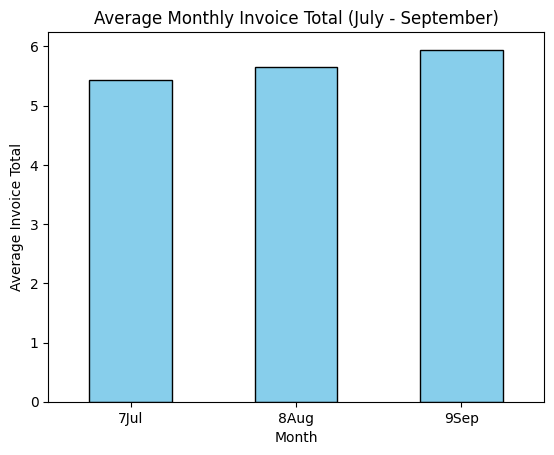

In [9]:
import matplotlib.pyplot as plt

#Loadig inv_jul, inv_aug and inv_sep from dataset files
inv_jul = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/inv_jul.csv?raw=True')
inv_aug = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/inv_aug.csv?raw=True')
inv_sep = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/inv_sep.csv?raw=True')

#Exploring the firt few rows of inv_jul, inv_aug, and inv_sep
print(inv_jul.head())
print(inv_aug.head())
print(inv_sep.head())




# Step 1: Concatenate the three tables with keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep],
                            keys=['7Jul', '8Aug', '9Sep'])

# Step 2: Group by the keys (month) and calculate the average total
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0)['total'].agg('mean')

# Step 3: Create a bar chart of the average invoice totals
avg_inv_by_month.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Monthly Invoice Total (July - September)')
plt.ylabel('Average Invoice Total')
plt.xlabel('Month')
plt.xticks(rotation=0)  # Keep month labels horizontal
plt.show()




# **Concatenate and merge to find common songs**

The senior leadership of the streaming service is requesting your help again. You are given the historical files for a popular playlist in the classical music genre in 2018 and 2019. Additionally, you are given a similar set of files for the most popular pop music genre playlist on the streaming service in 2018 and 2019. Your goal is to concatenate the respective files to make a large classical playlist table and overall popular music table. Then filter the classical music table using a semi join to return only the most popular classical music tracks.

The tables `classic_18`, `classic_19`, and `pop_18`, `pop_19` have been loaded for you in the first few lines of code in the codecell given below.

**Instructions:**
* Concatenate the `classic_18` and `classic_19` tables vertically where the index goes from 0 to n-1, and save to `classic_18_19`.
* Concatenate the `pop_18` and `pop_19` tables vertically where the index goes from 0 to n-1, and save to `pop_18_19`.
* With `classic_18_19` on the left, merge it with `pop_18_19` on `tid` using an inner join and assing it to `classic_pop`.
* Use `.isin()` to filter `classic_18_19` where `tid` is in `classic_pop`.



In [11]:
#Loading classic_18, classic_19, and pop_18, pop_19 DataFrames from dataset files
classic_18 = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/classic_18.csv?raw=True')
classic_19 = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/classic_19.csv?raw=True')
pop_18 = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/pop_18.csv?raw=True')
pop_19 = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/pop_19.csv?raw=True')

#Exploring the first few rows of each DataFrame using .head() method
print(classic_18.head())
print(classic_19.head())
print(pop_18.head())
print(pop_19.head())

classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Step 2: Concatenate pop_18 and pop_19 vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

# Step 3: Merge classic_18_19 with pop_18_19 on 'tid' using an inner join
classic_pop = pd.merge(classic_18_19, pop_18_19, on='tid', how='inner', suffixes=('_classic', '_pop'))

# Step 4: Filter classic_18_19 where 'tid' is in classic_pop
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]


# Print popular chart
print(popular_classic)

   pid   tid
0   12  3483
1   12  3416
2   12  3489
3   12  3479
4   12  3440
   pid   tid
0   12  3482
1   12  3434
2   12  3448
3   12  3499
4   12  3425
   pid   tid
0    1  3063
1    1  2712
2    1  2641
3    1  2271
4    1   919
   pid   tid
0    1  2115
1    1   297
2    1   272
3    1  3023
4    1  1193
    pid   tid
3    12  3479
10   12  3439
21   12  3445
23   12  3449
48   12  3437
50   12  3435
